# Linjär klassificering. Rapport.

#### Algoritmen undersöker den gränsen som separerar olika klasser baserad på indata för den linjära funktionen. Poängen är att tilldela rätt klass till datapunkter. För att bestämma klassen för en viss punkt, jämför algoritmen y-värdet för denna punkt och y-värdet för den linjär funktion i x-värdet för denna punkt.

In [74]:
import matplotlib.pyplot as plt

def convert_to_float (input_list):          # function for convert to float.
    output_list_float = []
    for element in input_list:
        sublist = []
        for string in element:
            converted_float = float(string)
            sublist.append(converted_float)
        output_list_float.append(sublist)
    return output_list_float

def points_classification(k,m, points):         # function for point classification.
    points_class = []
    for l in points:
        l=l.copy()
        if l[1] > k*l[0]+m:
            l.append(1)
        else:
            l.append(0)
        points_class.append(l)
    return points_class

with open ("unlabelled_data.csv","r") as f_read:           # Cleans data in unlabeled_data file.

    data_list_step_01 = [data.strip("\n").replace(","," ") for data in f_read.readlines()]
    data_list_step_02 = [data.split() for data in data_list_step_01]

data_list_float = convert_to_float(data_list_step_02)           # function for convert to float calls.  

x_list = [data[0] for data in data_list_float]          # Creates lists for x and y. 
y_list = [data[1] for data in data_list_float]


#### Alla linjära funktioner skrivs med formeln y = kx + m, där "k" är linjens lutning och "m" talar om var linjen skär y-axeln. I vart fall har vi två linjer som lutar nedåt och en som lutar uppåt.

In [75]:
# function f(x) = -0.489x
x = list(range(-4,5))
k_f = -0.489
m_f = 0
y_f = [k_f*x+m_f for x in x]

points_class_f = points_classification(k_f,m_f, data_list_float)

points_class_0_f, points_class_1_f = [], []                             # classification lists creates.
for element in points_class_f:
    if element[2] == 0:
        points_class_0_f.append(element)
    else:
        points_class_1_f.append(element)

x_point_class_0_f = [element[0] for element in points_class_0_f]
y_point_class_0_f = [element[1] for element in points_class_0_f]
x_point_class_1_f = [element[0] for element in points_class_1_f]
y_point_class_1_f = [element[1] for element in points_class_1_f]

In [76]:
# function g(x) = −2x + 0.16
x = list(range(-4,5))
k_g = -2
m_g = 0.16
y_g = [k_g*x+m_g for x in x]

points_class_g = points_classification(k_g,m_g, data_list_float)

points_class_0_g, points_class_1_g = [], []                             # classification lists creates.
for element in points_class_g:
    if element[2] == 0:
        points_class_0_g.append(element)
    else:
        points_class_1_g.append(element)

x_point_class_0_g = [element[0] for element in points_class_0_g]
y_point_class_0_g = [element[1] for element in points_class_0_g]
x_point_class_1_g = [element[0] for element in points_class_1_g]
y_point_class_1_g = [element[1] for element in points_class_1_g]

In [77]:
# function h(x) = 800x − 120
x = list(range(-4,5))
k_h = 800
m_h = 120
y_h = [k_h*x+m_h for x in x]

points_class_h = points_classification(k_h,m_h, data_list_float)

points_class_0_h, points_class_1_h = [], []                             # classification lists creates.
for element in points_class_h:
    if element[2] == 0:
        points_class_0_h.append(element)
    else:
        points_class_1_h.append(element)

x_point_class_0_h = [element[0] for element in points_class_0_h]
y_point_class_0_h = [element[1] for element in points_class_0_h]
x_point_class_1_h = [element[0] for element in points_class_1_h]
y_point_class_1_h = [element[1] for element in points_class_1_h]
k=len(points_class_0_f)

In [78]:
print(f'''\n============== Labeled data ==============\n
      Function f(x) = -0.489x
      Points with class 0 - {len(points_class_0_f)}.
      Points with class 1 - {len(points_class_1_f)}.\n
      Function g(x) = -2x + 0.16
      Points with class 0 - {len(points_class_0_g)}.
      Points with class 1 - {len(points_class_1_g)}.\n
      Function h(x) = 800x - 120
      Points with class 0 - {len(points_class_0_h)}.
      Points with class 1 - {len(points_class_1_h)}.\n''')


============== Labeled data ==============

      Function f(x) = -0.489x
      Points with class 0 - 299.
      Points with class 1 - 301.

      Function g(x) = -2x + 0.16
      Points with class 0 - 299.
      Points with class 1 - 301.

      Function h(x) = 800x - 120
      Points with class 0 - 306.
      Points with class 1 - 294.



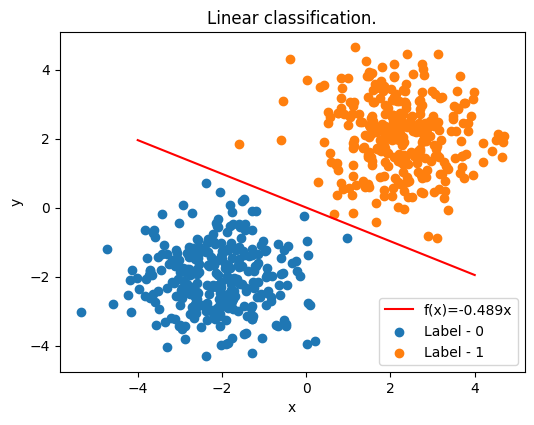

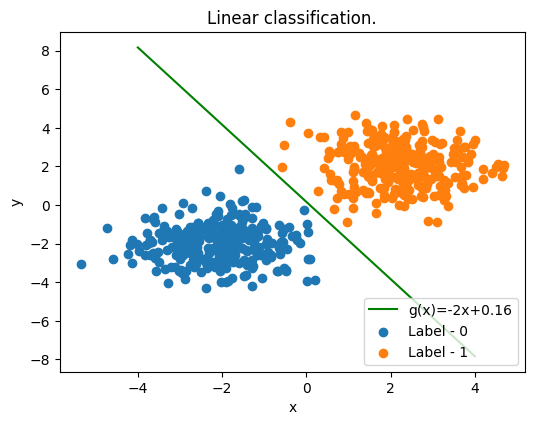

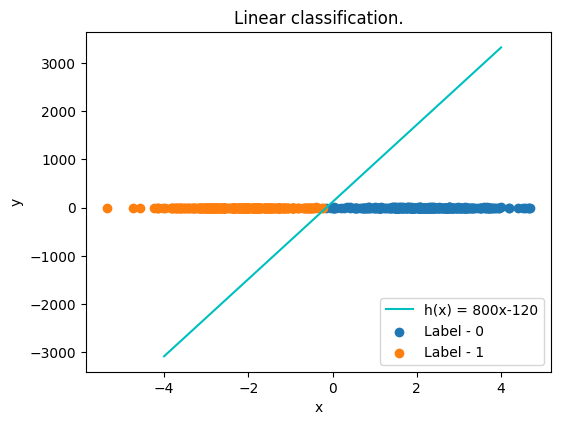

In [79]:
# function f(x) = -0.489x

plt.figure(figsize=(6,15), dpi=100)
plt.subplot(3,1,1)
plt.plot(x,y_f,"r")
plt.scatter(x_point_class_0_f, y_point_class_0_f)
plt.scatter(x_point_class_1_f, y_point_class_1_f)
plt.title("Linear classification.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)=-0.489x", "Label - 0", "Label - 1"], loc=4)

# function g(x) = −2x + 0.16
plt.figure(figsize=(6,15), dpi=100)
plt.subplot(3,1,2)
plt.plot(x,y_g,"g")
plt.scatter(x_point_class_0_g, y_point_class_0_g)
plt.scatter(x_point_class_1_g, y_point_class_1_g)
plt.title("Linear classification.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["g(x)=-2x+0.16", "Label - 0", "Label - 1"], loc=4)

# function h(x) = 800x − 120
plt.figure(figsize=(6,15), dpi=100)
plt.subplot(3,1,3)
plt.plot(x,y_h,"c")
plt.scatter(x_point_class_0_h, y_point_class_0_h)
plt.scatter(x_point_class_1_h, y_point_class_1_h)
plt.title("Linear classification.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["h(x) = 800x-120", "Label - 0", "Label - 1"], loc=4)

plt.show()